In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#@markdown **Libraries**
!rm '/content/clustering' -rf
!git clone 'http://www.github.com/Nak007/clustering.git'

!pip install factor-analyzer
import pandas as pd, numpy as np
from clustering import pca_analysis as pca

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format =  '{:,.2f}'.format

### **Example**

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs( n_samples=1000, n_features=10, centers=5, cluster_std=2, center_box=(-10,10), random_state=1)
X = pd.DataFrame(X, columns=['feature_{0}'.format(n) for n in range(1,11)])

In [4]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,-0.85,5.59,-12.19,-3.61,-5.58,-10.06,-6.81,-3.02,-4.81,1.41
1,0.03,2.69,-9.30,-6.58,-7.14,-11.38,-4.03,-2.27,-2.11,-0.77
2,9.53,8.73,-6.36,4.94,-5.06,0.95,7.97,-4.32,-2.23,-5.81
3,-2.83,4.54,-8.99,5.51,-8.80,5.02,-1.11,1.02,-3.83,-5.63
4,-5.18,6.96,-9.27,10.76,-5.17,0.90,-3.07,1.15,-5.52,-10.38


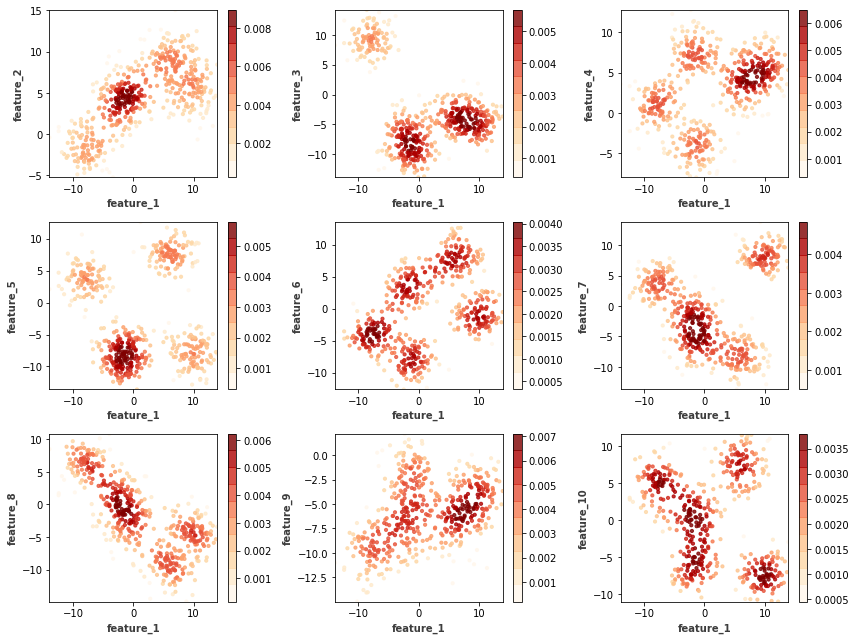

In [5]:
f_plot = pca.plot_factors(0, 0.5, 0, 3)
f_plot.fit(X, 'feature_1', fname=None)

### **Capping Outliers**

In [0]:
m = pca.outliers(method='gamma')
m.fit(X)
capped_X = pd.DataFrame(m.capped_X)

In [0]:
# list of lower and upper bounds
#pd.DataFrame(m.limit_).head()

### **Standardization**

In [0]:
from sklearn.preprocessing import QuantileTransformer

In [0]:
# method: {'shift_scale','robust','q_normal','q_uniform'}
X_std = QuantileTransformer(output_distribution='normal').fit_transform(capped_X)
X_std = pd.DataFrame(X_std,columns=list(capped_X))

### **Principal Component Analysis**

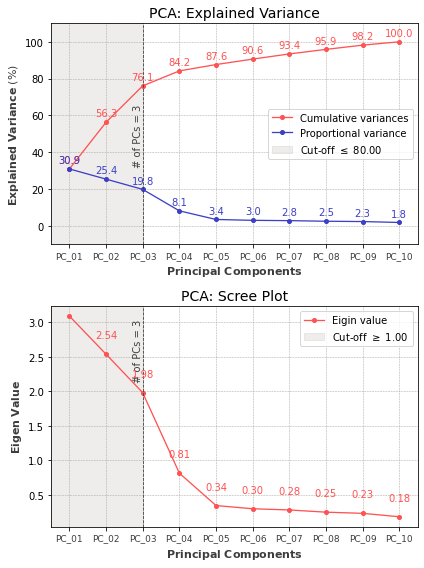

In [9]:
pca_ = pca.principal_components(80, 1)
pca_.fit(X_std)
pca_.plot(fname=None)

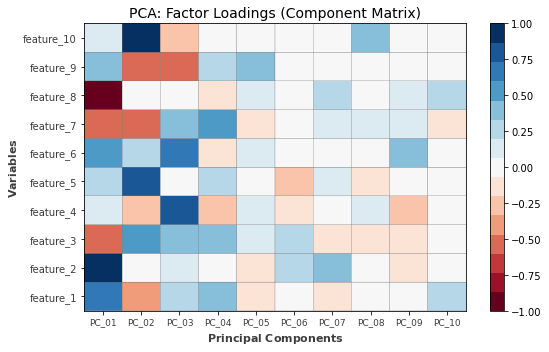

In [10]:
pca_.plot_factor_loadings(fname=None)

In [11]:
pc_score = pca_.transform(X_std, n_comps=8)
pc_score.head(4)

,PC_01,PC_02,PC_03,PC_04,PC_05,PC_06,PC_07,PC_08
0,0.72,-0.93,-3.76,-0.37,-0.54,-0.31,0.18,-0.02
1,-0.78,-1.72,-4.67,0.68,-0.30,-0.08,-0.14,-0.07
2,2.29,-2.25,0.72,0.99,0.05,-0.04,0.46,0.05
3,0.01,-1.68,0.15,-1.03,0.31,-0.08,0.23,0.06


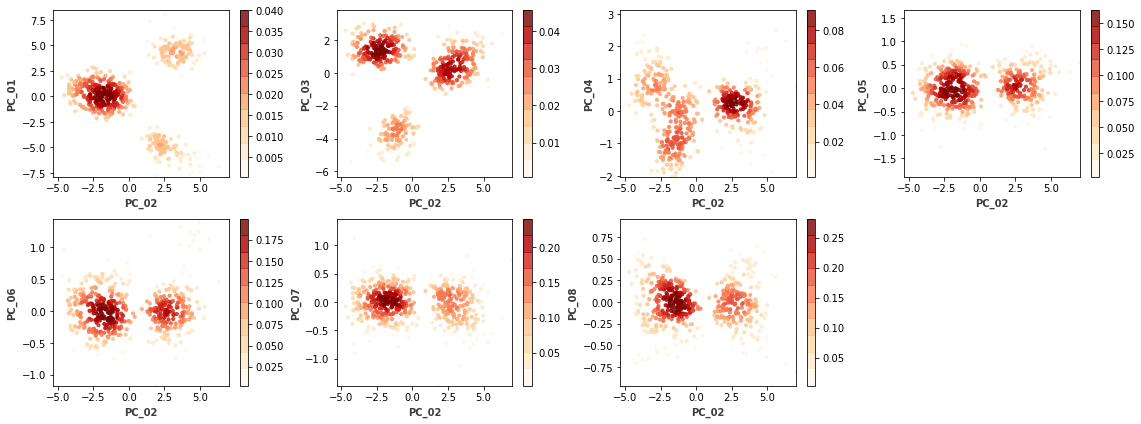

In [12]:
f_plot = pca.plot_factors(0, 0.5, 0, 4)
f_plot.fit(pc_score,'PC_02',fname=None)

### **Factor Rotation**

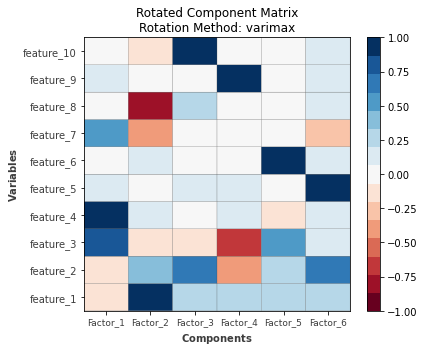

In [21]:
rotated_pc = pca.factor_analysis(pca_.loadings)
rotated_pc.fit(6, 'varimax')
rotated_pc.plot(fname=None)

In [22]:
factor_score = rotated_pc.transform(X_std)
factor_score.head(4)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,-2.93,0.32,0.43,1.22,-2.91,-0.14
1,-2.85,-0.29,-0.48,1.66,-3.19,-1.02
2,0.33,1.60,0.14,1.19,0.52,0.95
3,-0.15,-0.59,-0.59,0.94,0.06,-0.78


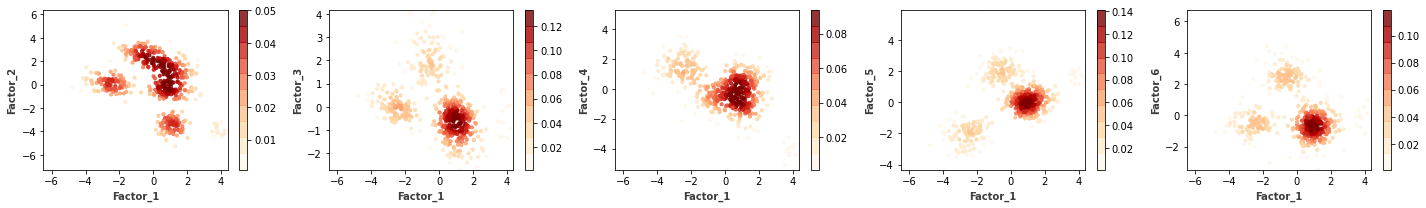

In [24]:
f_plot = pca.plot_factors(0, 0.5, 0, 5)
f_plot.fit(factor_score, 'Factor_1', fname=None)

### **Final Dataset**

In [0]:
kwargs = dict(how='left', left_index=True, right_index=True)
merge_df = capped_X.merge(pc_score,**kwargs).merge(factor_score,**kwargs)